In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('C:\\Users\\sabri\\Documents\\NSS\\Python\\projects\\un-project-Sabrina9611L\\data\\gdp_percapita.csv.csv')
internet_df = pd.read_csv('C:\\Users\\sabri\\Documents\\NSS\\Python\\projects\\un-project-Sabrina9611L\\data\\internet_use.csv.csv')

In [3]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
print('GDP Dataframe top and bottom values')
print(gdp_df.head())
print(gdp_df.tail())
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})
print('Internet Dataframe top and bottom values')
print(internet_df.head())
print(internet_df.tail())

GDP Dataframe top and bottom values
       Country  Year  GDP_Per_Capita
0  Afghanistan  2023     1992.424394
1  Afghanistan  2022     1981.710168
2  Afghanistan  2021     2144.166570
3  Afghanistan  2020     2769.685745
4  Afghanistan  2019     2927.245144
       Country  Year  GDP_Per_Capita
8214  Zimbabwe  1994     3965.730986
8215  Zimbabwe  1993     3634.750494
8216  Zimbabwe  1992     3649.891947
8217  Zimbabwe  1991     4126.405247
8218  Zimbabwe  1990     4013.299059
Internet Dataframe top and bottom values
       Country  Year  Internet_Users_Pct
0  Afghanistan  2019               17.60
1  Afghanistan  2018               16.80
2  Afghanistan  2017               13.50
3  Afghanistan  2016               11.00
4  Afghanistan  2015                8.26
       Country  Year  Internet_Users_Pct
6078  Zimbabwe  1997            0.033080
6079  Zimbabwe  1996            0.016790
6080  Zimbabwe  1995            0.007684
6081  Zimbabwe  1994            0.001739
6082  Zimbabwe  1990        

In [4]:
print(gdp_df.shape)
print(gdp_df.dtypes)

(8219, 3)
Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


5. How many rows and columns are in `gdp_df`? What are the data types of each column?
    There are 8,219 rows and 3 columns, Country: object, Year: int64, GDP_Per_Capita: float64 

In [5]:
pivot_gdp = pd.pivot_table(gdp_df, values = ['Year', 'GDP_Per_Capita'], index = 'Country', aggfunc = 'count', )
pivot_gdp.sort_values(by = 'Year', ascending = False)
max_year = pivot_gdp[pivot_gdp['Year'] == 34]
max_year

,GDP_Per_Capita,Year
Country,,
Africa Eastern and Southern,34,34
Africa Western and Central,34,34
Albania,34,34
Algeria,34,34
Andorra,34,34
...,...,...
Vanuatu,34,34
Viet Nam,34,34
World,34,34


In [6]:
not_max = pivot_gdp[pivot_gdp['Year'] != 34]
not_max

,GDP_Per_Capita,Year
Country,,
Afghanistan,24,24
Bhutan,33,33
Cayman Islands,18,18
CuraÃ§ao,24,24
Djibouti,11,11
Faroe Islands,16,16
Greenland,32,32
Kosovo,16,16
Lebanon,33,33


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?
    228 countries had data for all of the years, 11 are missing more than 5 years of data it looks like there is only one observation per year based on the pivot tables above

<Axes: xlabel='GDP_Per_Capita'>

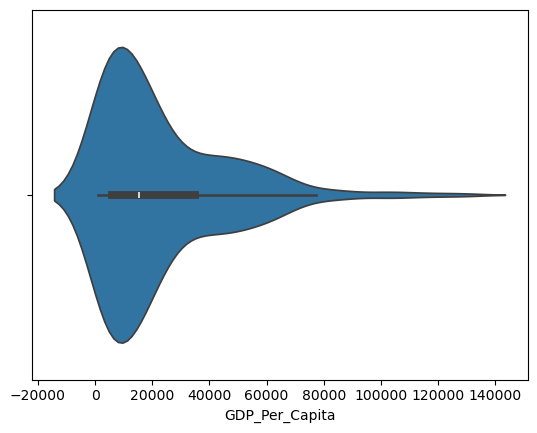

In [7]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
# plot
sns.violinplot(x=gdp_2020["GDP_Per_Capita"])

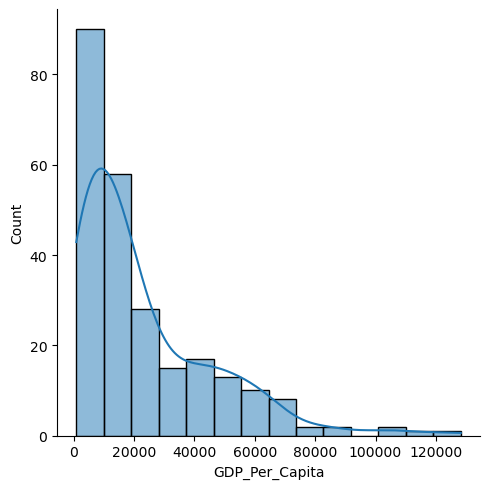

In [8]:
# Plot the histogram thanks to the displot function
sns.displot( data=gdp_2020["GDP_Per_Capita"], kde=True )

<Axes: xlabel='GDP_Per_Capita'>

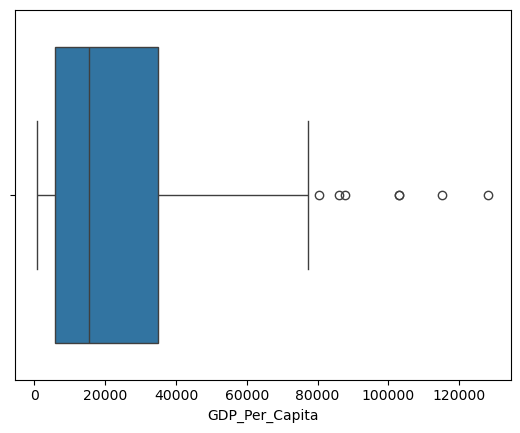

In [9]:
sns.boxplot( x=gdp_2020["GDP_Per_Capita"] )

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

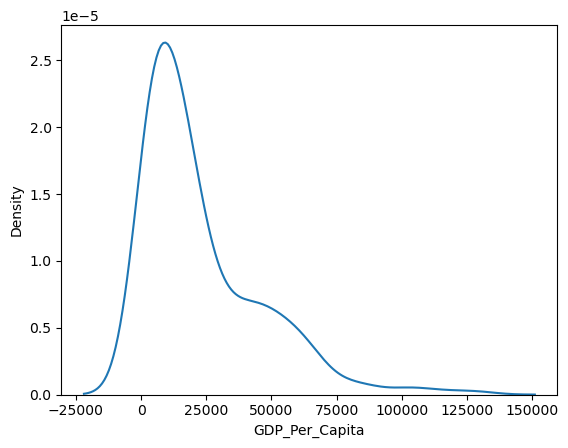

In [10]:
# Make default density plot
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
    All of the plots show that the majority of the GDP_Per_Capita is on the low side around or below 20,000 and there are some outliers that extend far beyond 100,000. As far as the information you get out of one that you dont get out of the others, I think it boils down to a preference in how you like the visuals. All of these seem to convey the same message to me. I personally prefer the histogram as it is the easiest one to read.


In [11]:
gdp_2020['GDP_Per_Capita'].median()

15309.23598817024

9. What was the median GDP per capita value in 2020?
   The Median GDP in 2020, $15,309.24

In [12]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

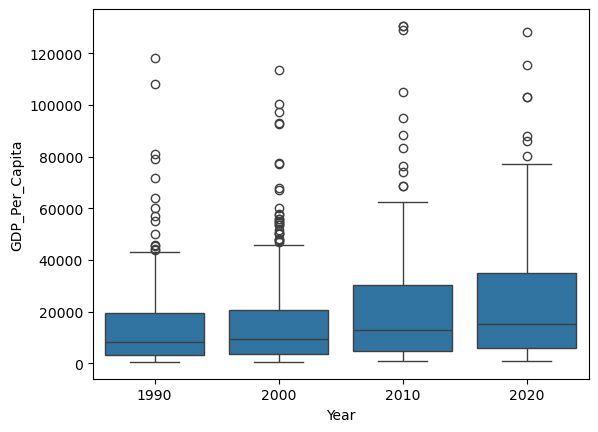

In [13]:
sns.boxplot( x=gdp_decades["Year"] , y =  gdp_decades["GDP_Per_Capita"] )

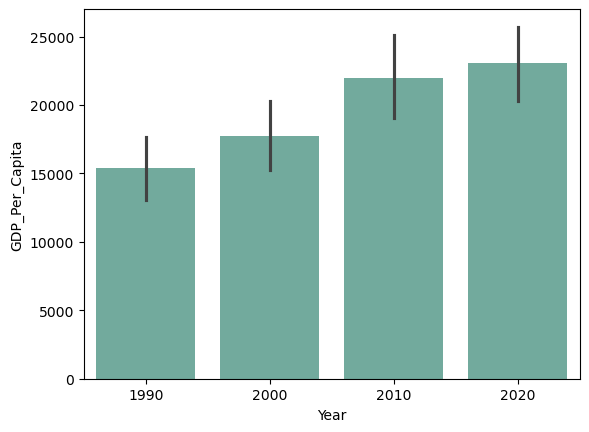

In [14]:
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    color='#69b3a2');

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

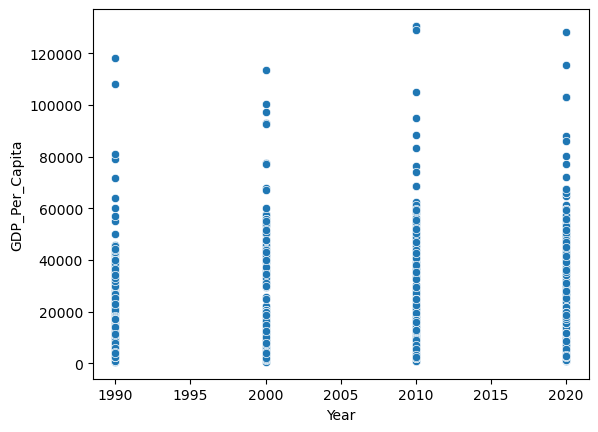

In [15]:
# use the function scatterplot() to make a scatterplot
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

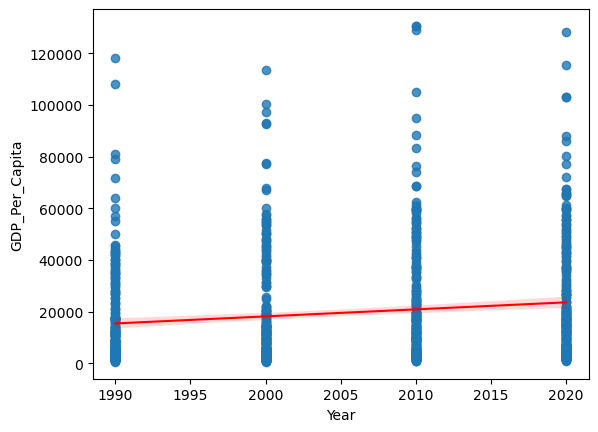

In [16]:
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "red", "linewidth": 1.5}
)
plt.show()

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
The GDP on average has grown over time, while some of the outliers spiked in 2010, they came back closer in 2020. In the boxplot it is easy to read and interpret the data, it can be a little hard to get the exact trend from this. In the barplot it is relatively easy to see the trends, though it it hard to conceptionalize the outliers. in the scatterplot it is hard to really see the concentration of points, but the outliers are easy to see. the trend is easiest to read in the scatterplot that includes a trendline.

In [17]:
over_100 = gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values(by='Year')

In [18]:
over_100.head()

,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057.042464
974,Brunei,1990,118163.683198
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
7825,United Arab Emirates,1992,101100.487512


11. Which country was the first to have a GDP per capita greater than $100,000?
    It seems as though UAB and Brunei were the first countries to have a GDP_Per_Capita over $100,000

In [19]:
gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341
6514,Singapore,2020,115304.149459
6119,Qatar,2020,103061.913414
3493,Ireland,2020,102989.787335
741,Bermuda,2020,87894.401174
...,...,...,...
5133,Mozambique,2020,1466.124765
6699,Somalia,2020,1396.053436
1734,Dem. Rep. Congo,2020,1277.632863
1302,Central African Republic,2020,1136.570530


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Luxembourg had the highest GDP in 2020

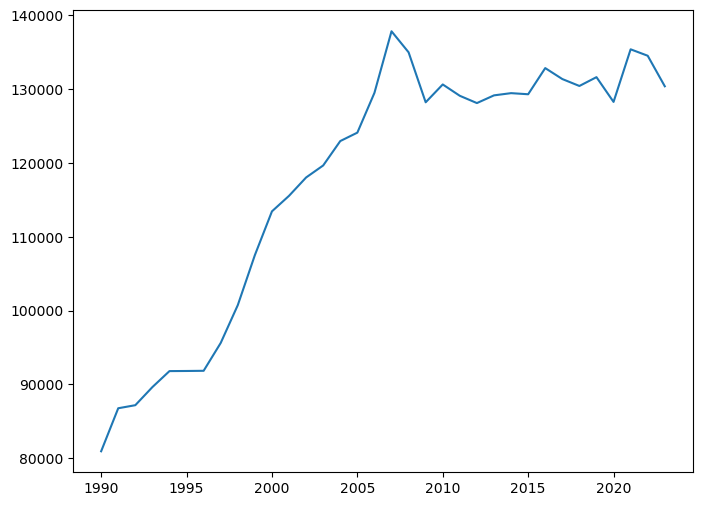

In [20]:
lux = gdp_df[gdp_df['Country'] == 'Luxembourg'].sort_values(by = 'Year')
# Make the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(lux['Year'], lux['GDP_Per_Capita']);

In [21]:
gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990? Burundi

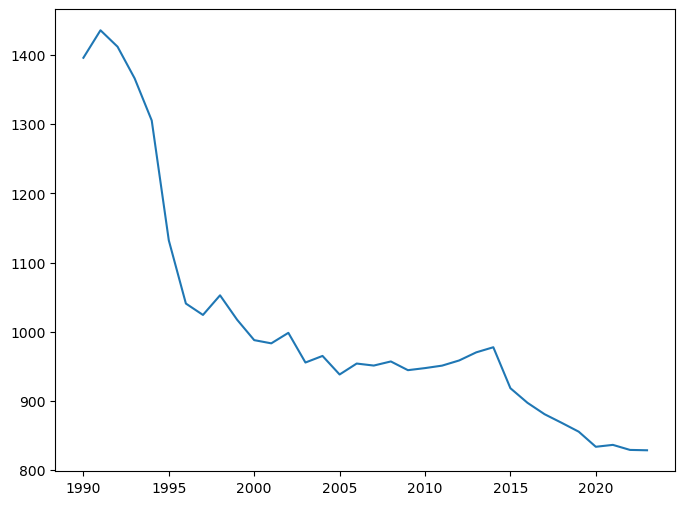

In [22]:
bur = gdp_df[gdp_df['Country'] == 'Burundi'].sort_values(by = 'Year')
# Make the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(bur['Year'], bur['GDP_Per_Capita']);

In [23]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
gdp_1990 = gdp_df[gdp_df['Year'] == 1990]
print(gdp_2020['GDP_Per_Capita'].median())
print(gdp_1990['GDP_Per_Capita'].median())

15309.23598817024
8243.732654963489


In [24]:
gdp_1990_2020 = pd.merge(gdp_1990, gdp_2020, on='Country', suffixes=('_1990', '_2020'))
gdp_1990_2020['Difference'] = gdp_1990_2020['GDP_Per_Capita_2020'] - gdp_1990_2020['GDP_Per_Capita_1990']
gdp_1990_GT_2020 = gdp_1990_2020[gdp_1990_2020['Difference'] < 0]
gdp_1990_GT_2020.count()
for c in gdp_1990_GT_2020['Country']:
    print(c + ', ')

Aruba, 
Barbados, 
Brunei, 
Burundi, 
Central African Republic, 
Congo, 
Dem. Rep. Congo, 
Fragile and conflict affected situations, 
Gabon, 
Haiti, 
Kyrgyz Republic, 
Liberia, 
Libya, 
Madagascar, 
Moldova, 
Nauru, 
Saudi Arabia, 
St. Lucia, 
Syrian Arab Republic, 
Tajikistan, 
The Bahamas, 
Ukraine, 
United Arab Emirates, 
Zimbabwe, 


**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990? Yes it is true in general that most countries have higher GDP in 2020 than 1990, there are 24 countries that had higher in 1990 and they are as follows:Aruba, Barbados, Brunei, Burundi, Central African Republic, Congo, Dem. Rep. Congo, Fragile and conflict affected situations, Gabon, Haiti, Kyrgyz Republic, Liberia, Libya, Madagascar, Moldova, Nauru, Saudi Arabia, St. Lucia, Syrian Arab Republic, Tajikistan, The Bahamas, Ukraine, United Arab Emirates, Zimbabwe

16. Look at the number of observations in this dataset per year. What do you notice? There was a dip in the 90s and the dataset must have been collected towards the beginning of 2023 due to the low volume.

In [25]:
pivot_internet = pd.pivot_table(internet_df, values = ['Internet_Users_Pct'], index = ['Year'], aggfunc = 'count')
pivot_internet.sort_values(by = 'Year', ascending = False)

,Internet_Users_Pct
Year,
2023,11
2022,184
2021,186
2020,186
2019,185
2018,174
2017,205
2016,206
2015,203


17. What is the first year to have a non-zero internet users percentage value? 1990

In [26]:
pivot_internet = pd.pivot_table(internet_df, values = ['Internet_Users_Pct'], index = ['Year', 'Country'], aggfunc = 'mean')
pivot_internet.sort_values(by = 'Year', ascending = False)
nonz = pivot_internet[pivot_internet['Internet_Users_Pct'] != 0].sort_values(by = 'Year', ascending = True)
nonz

Internet_Users_Pct
Year Country                                   
1990 Australia                         0.585095
     United States                     0.784729
     United Kingdom                    0.087355
     Sweden                            0.584192
     Spain                             0.012874
...                                         ...
2023 Bosnia and Herzegovina           83.377200
     Bangladesh                       44.502700
     Sweden                           95.703300
     Ecuador                          72.694300
     Türkiye                          85.960700

[5803 rows x 1 columns]

18. How does the distribution of internet users percent differ for 2000 and 2014? It looks as though the internet percentage was heavier distributed on the low end, and there were no major spikes in 2014

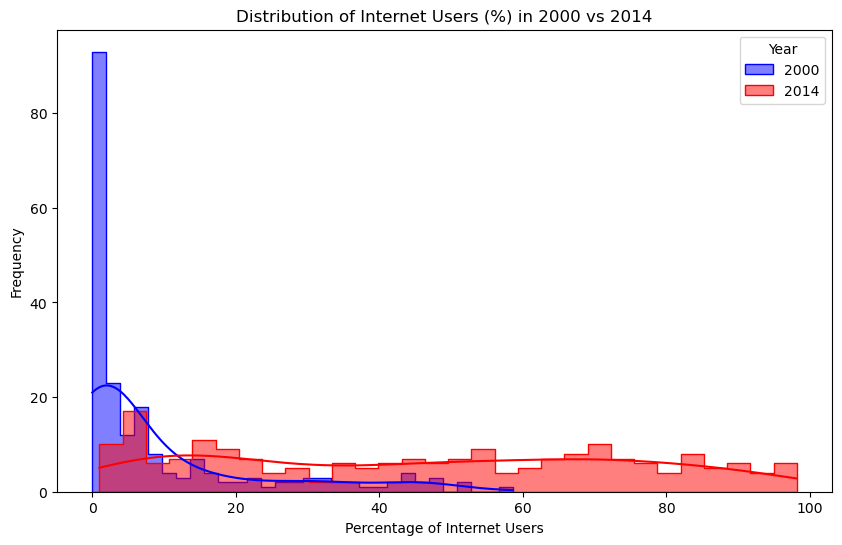

In [27]:
internet_2000 = internet_df[internet_df["Year"] == 2000]["Internet_Users_Pct"]
internet_2014 = internet_df[internet_df["Year"] == 2014]["Internet_Users_Pct"]

plt.figure(figsize=(10, 6))
sns.histplot(internet_2000, bins=30, kde=True, color="blue", label="2000", element="step")
sns.histplot(internet_2014, bins=30, kde=True, color="red", label="2014", element="step")

plt.xlabel("Percentage of Internet Users")
plt.ylabel("Frequency")
plt.title("Distribution of Internet Users (%) in 2000 vs 2014")
plt.legend(title="Year")
plt.show()

19. For how many countries was the percentage of internet users below 5% in 2014? 10

In [28]:
internet_2014 = internet_df[internet_df["Year"] == 2014]
internet_2014 = internet_2014[internet_2014["Internet_Users_Pct"] < 5]

In [29]:
internet_2014

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [30]:
gdp_and_internet_use = gdp_df.merge(internet_df, on =['Year', 'Country'], how = 'left')

In [31]:
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2023     1992.424394                 NaN
1  Afghanistan  2022     1981.710168                 NaN
2  Afghanistan  2021     2144.166570                 NaN
3  Afghanistan  2020     2769.685745                 NaN
4  Afghanistan  2019     2927.245144                17.6
       Country  Year  GDP_Per_Capita  Internet_Users_Pct
8214  Zimbabwe  1994     3965.730986            0.001739
8215  Zimbabwe  1993     3634.750494                 NaN
8216  Zimbabwe  1992     3649.891947                 NaN
8217  Zimbabwe  1991     4126.405247                 NaN
8218  Zimbabwe  1990     4013.299059            0.000000


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice? All three countries have a good GDP per capita, though Bermudas sank drastically around 2010s. The other 2 countries have been steadily increasing since the beginning of the internet age

In [32]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014].sort_values(by='Internet_Users_Pct', ascending = False)
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3193,Iceland,2014,57981.199448,98.1580
747,Bermuda,2014,92298.387811,96.8000
5547,Norway,2014,84753.668395,96.3005
1774,Denmark,2014,60992.212220,95.9935
4432,Luxembourg,2014,129443.183641,94.6702


In [33]:
gdp_and_internet_use_mask = gdp_and_internet_use["Country"].isin(['Iceland', 'Bermuda','Norway'])
gdp_and_internet_use_top_2014 = gdp_and_internet_use[gdp_and_internet_use_mask]

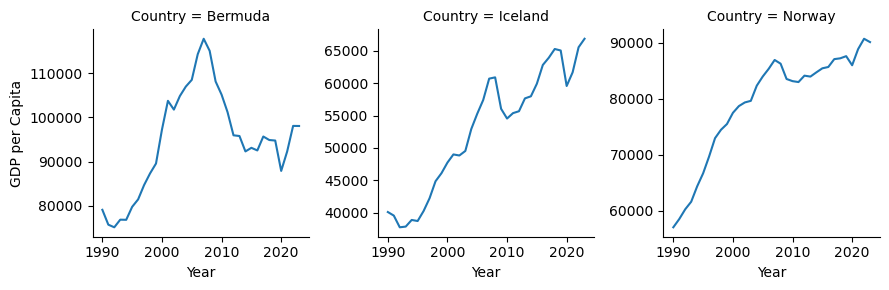

In [34]:
g = sns.FacetGrid(gdp_and_internet_use_top_2014, col="Country", col_wrap=3, sharey=False)
g.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")
g.set_axis_labels("Year", "GDP per Capita")
plt.show()

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [35]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014].sort_values(by='Internet_Users_Pct', ascending = False)
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3193,Iceland,2014,57981.199448,98.1580
747,Bermuda,2014,92298.387811,96.8000
5547,Norway,2014,84753.668395,96.3005
1774,Denmark,2014,60992.212220,95.9935
4432,Luxembourg,2014,129443.183641,94.6702


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them. It seems like 

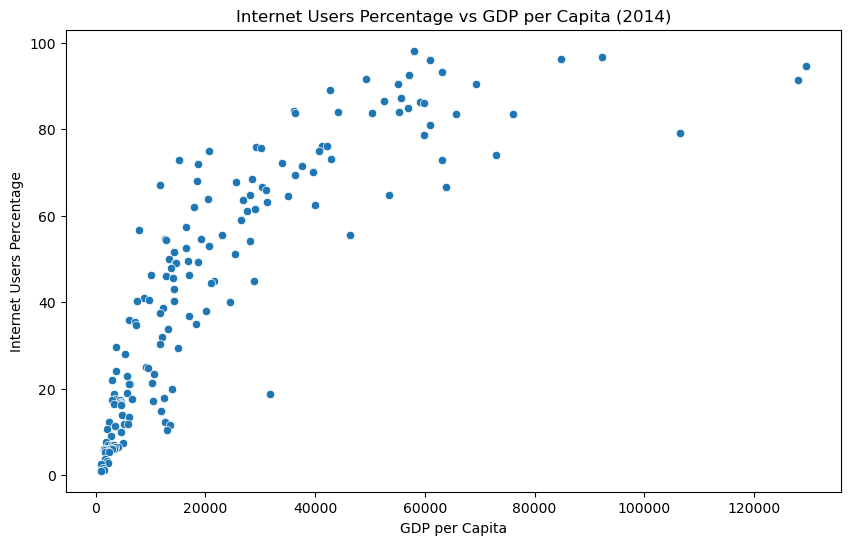

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_Per_Capita', y='Internet_Users_Pct', data=gdp_and_internet_use_2014)

# Add title and labels
plt.title('Internet Users Percentage vs GDP per Capita (2014)')
plt.xlabel('GDP per Capita')
plt.ylabel('Internet Users Percentage')

# Show plot
plt.show()

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [37]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3, labels=["Low", "Medium", "High"])
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
3193,Iceland,2014,57981.199448,98.1580,High
747,Bermuda,2014,92298.387811,96.8000,High
5547,Norway,2014,84753.668395,96.3005,High
1774,Denmark,2014,60992.212220,95.9935,High
4432,Luxembourg,2014,129443.183641,94.6702,High
...,...,...,...,...,...
7688,Turks and Caicos Islands,2014,26470.621917,NaN,High
7905,Upper middle income,2014,15312.435710,NaN,Medium
8074,Virgin Islands,2014,42853.898660,NaN,High
8096,West Bank and Gaza,2014,5990.426615,NaN,Low


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [38]:
median_internet_users = gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()
print(median_internet_users)

GDP_group
Low       11.6000
Medium    44.5945
High      75.9800
Name: Internet_Users_Pct, dtype: float64


C:\Users\sabri\AppData\Local\Temp\ipykernel_4616\4077978302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_internet_users = gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()
